In [1]:
import torch
import torch.nn.functional as F
torch.cuda.set_device(1)
import models, train, utils
from importlib import reload
reload(models)
reload(train)
reload(utils)

<module 'utils' from '/home/cse/btech/cs1180416/col870-deep-learning/A2/utils.py'>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
query_X = torch.load('data/pt-cache/query_X_split.pt')
query_y = torch.load('data/pt-cache/query_pred_adv.pt')

In [10]:
train_X, test_X, train_y, test_y = utils.balanced_split(query_X, query_y, test_size=10000)
train_Y = F.one_hot(train_y, num_classes=9).float()
torch.save((test_X, test_y), 'data/pt-cache/cgan_test_X_y.pt')

In [11]:
gen = models.Generator()
disc = models.Discriminator()

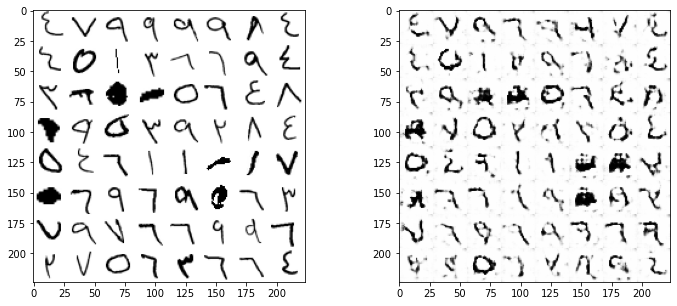

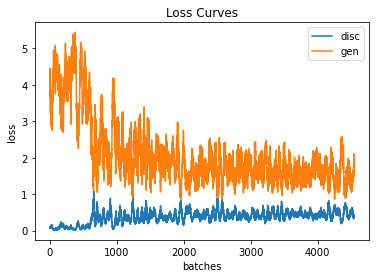

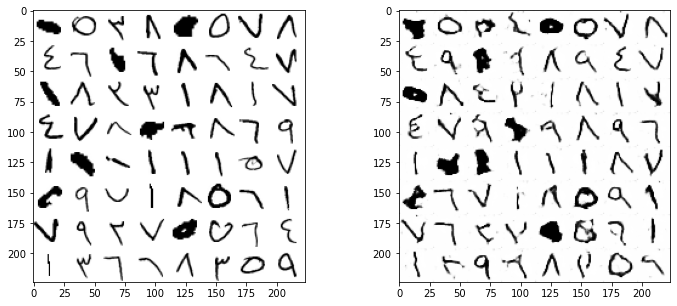

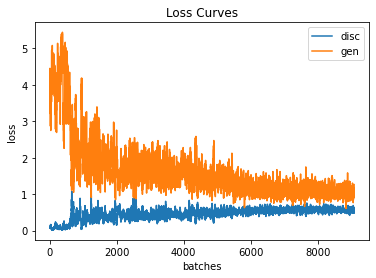

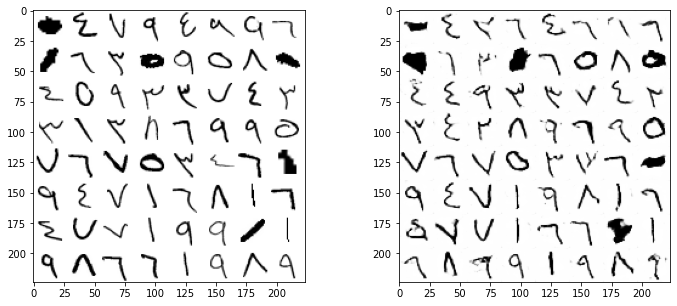

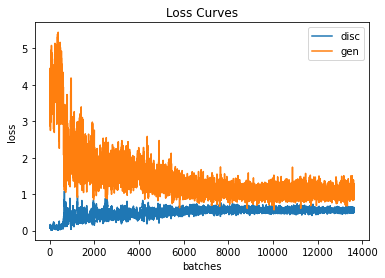

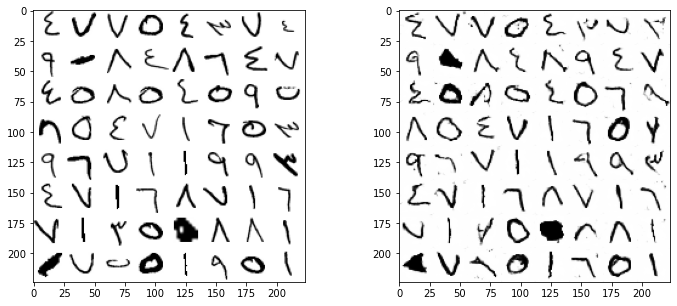

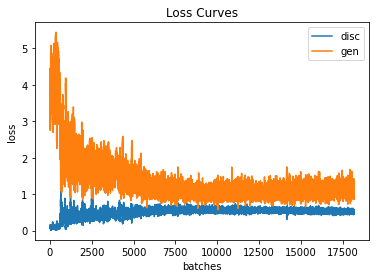

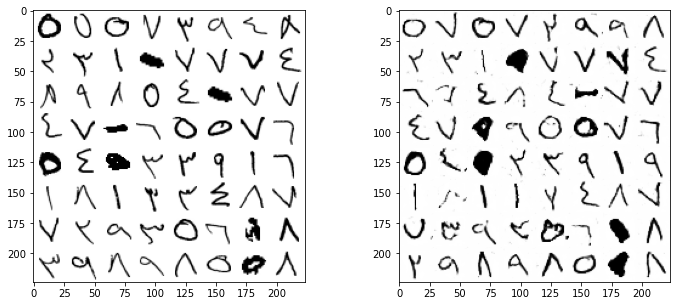

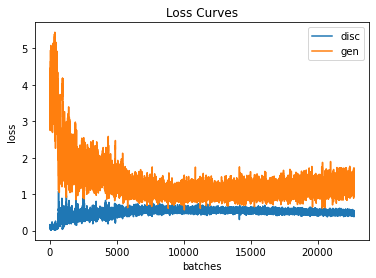

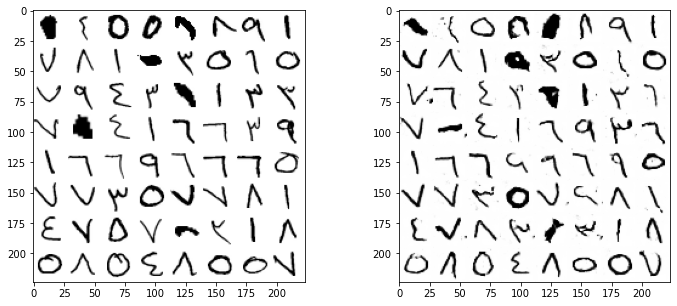

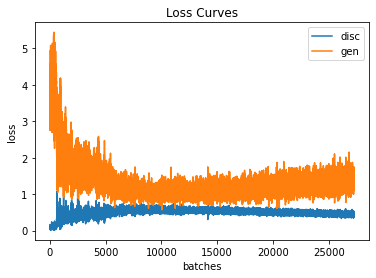

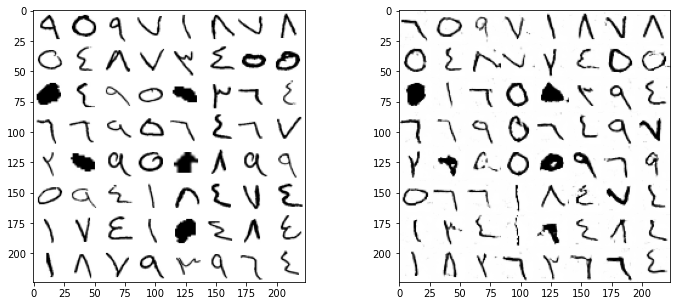

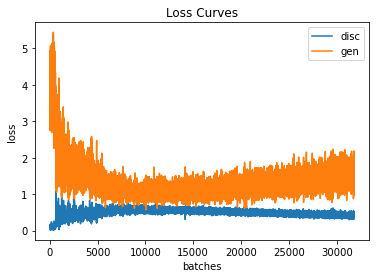

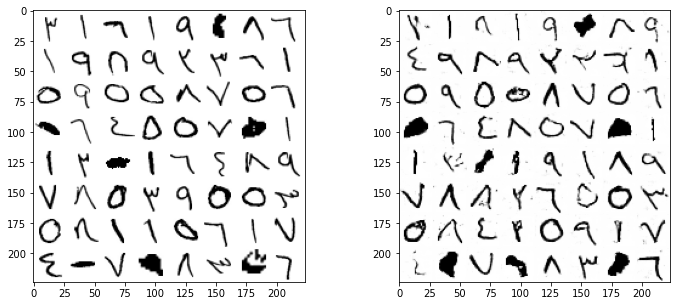

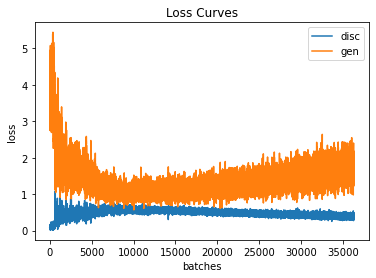

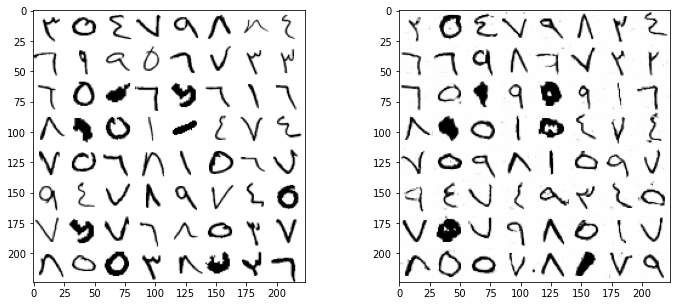

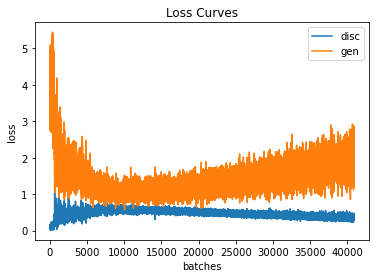

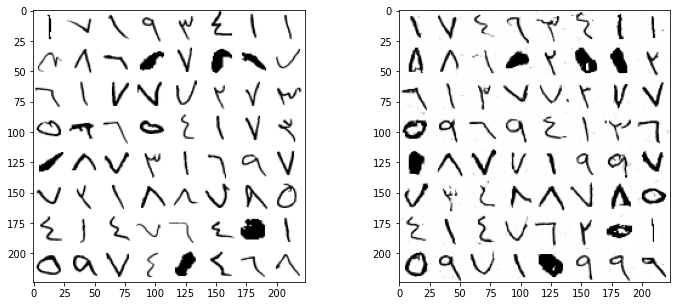

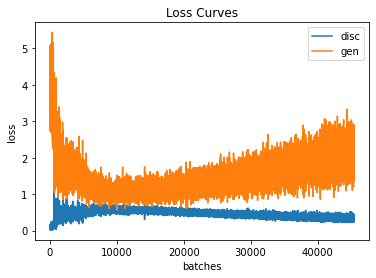

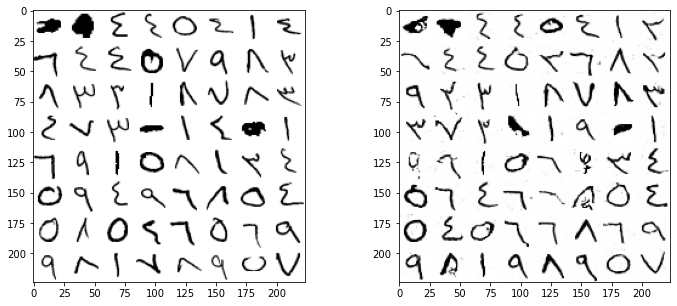

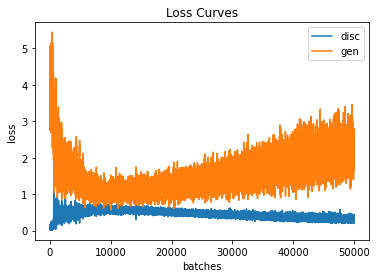

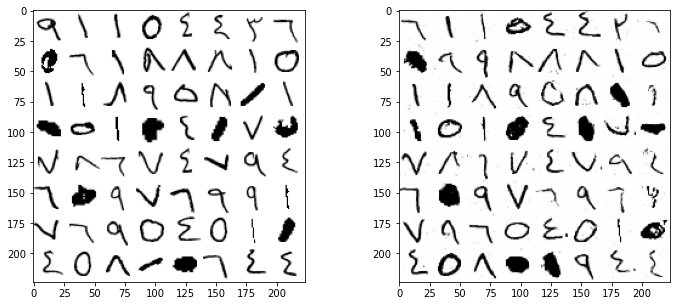

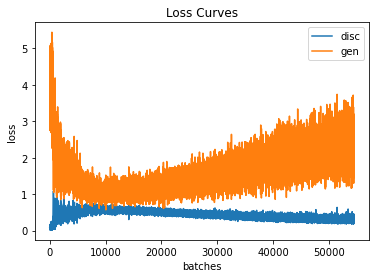

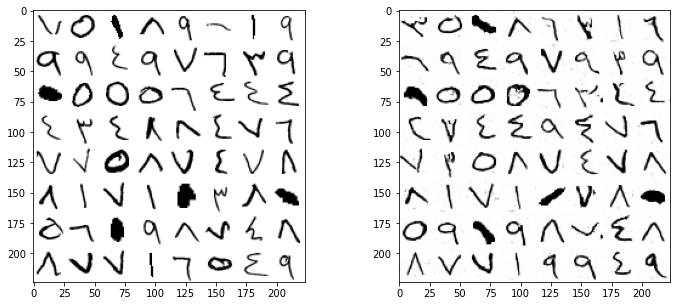

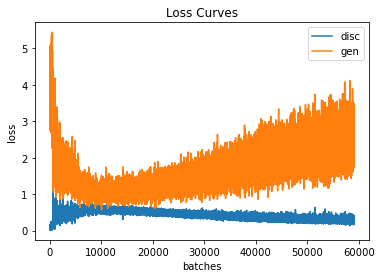

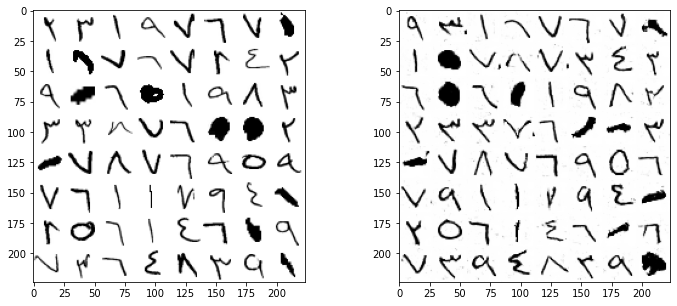

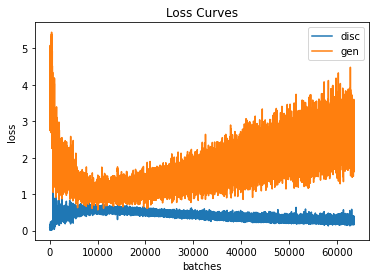

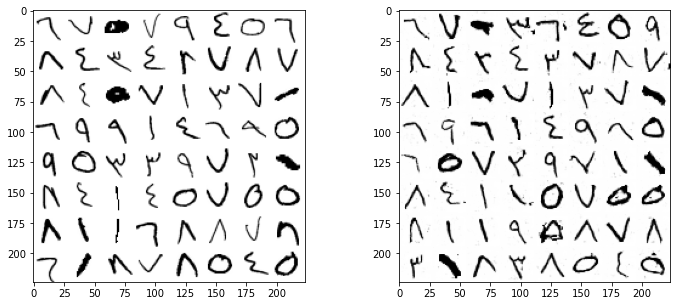

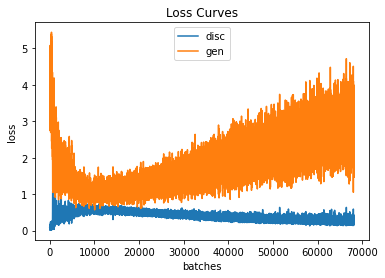

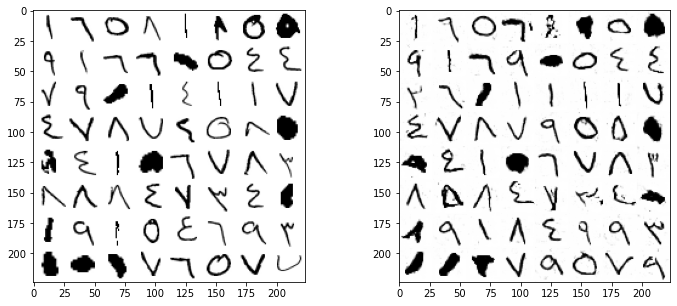

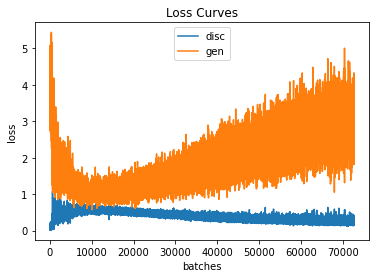

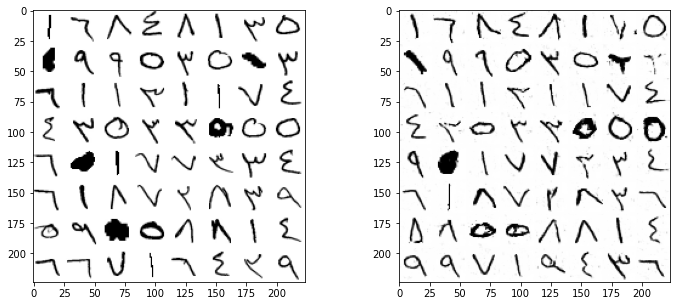

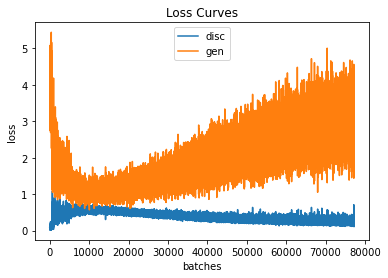

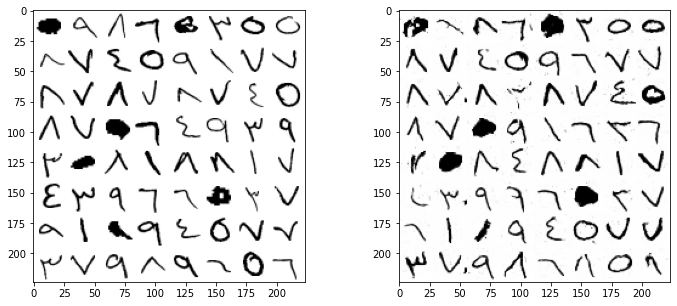

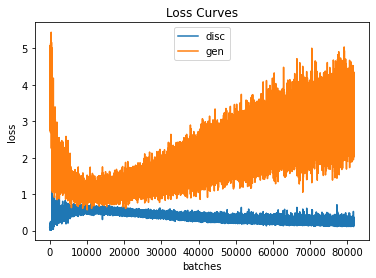

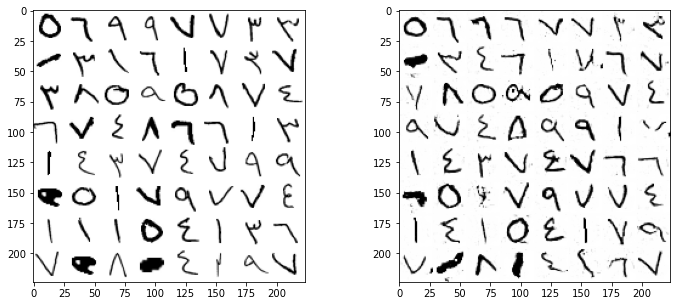

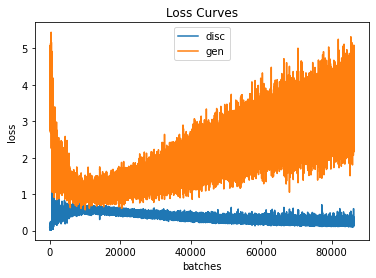

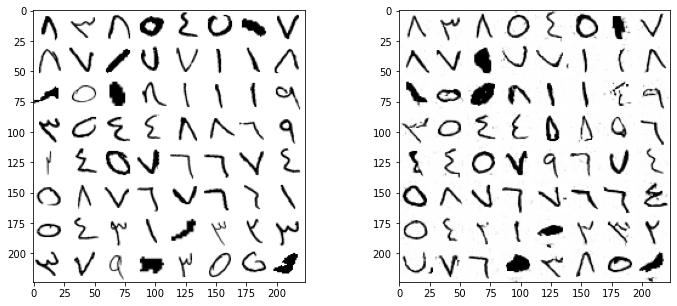

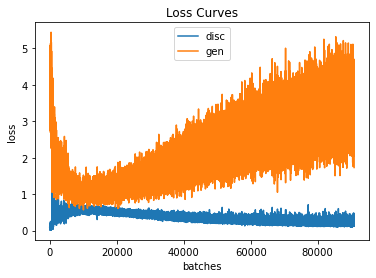

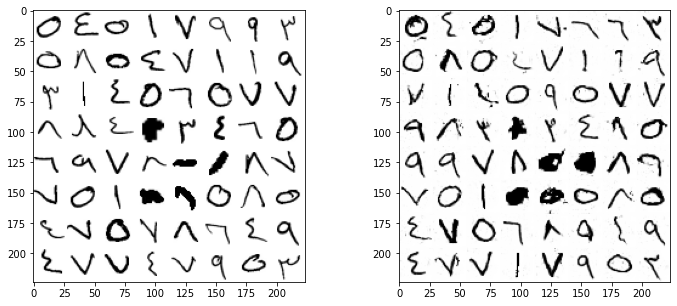

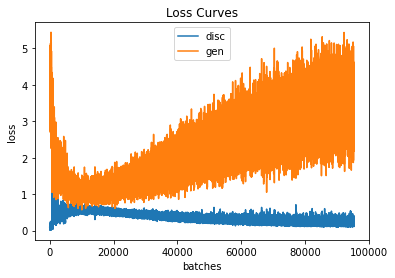

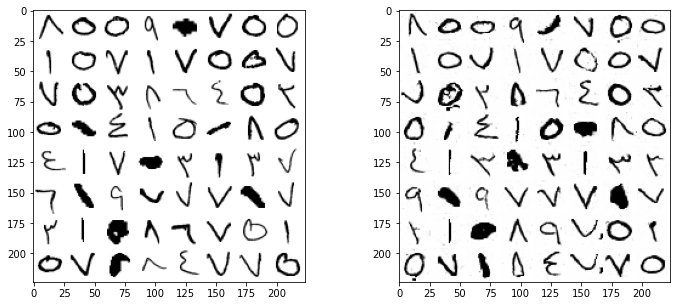

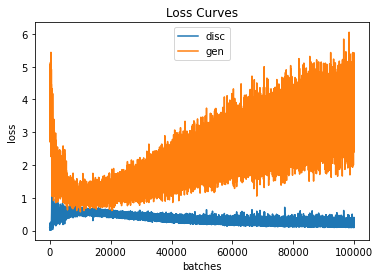

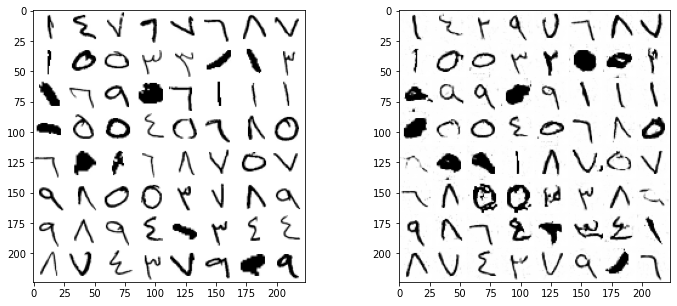

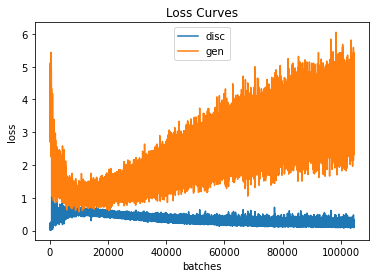

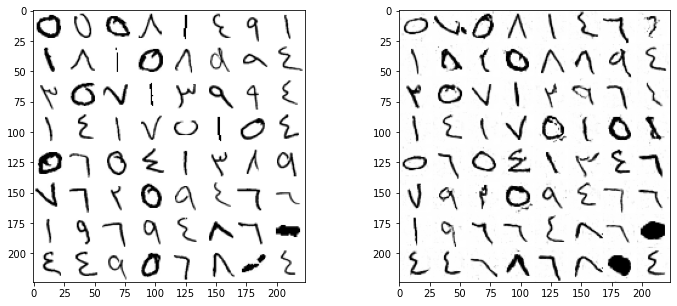

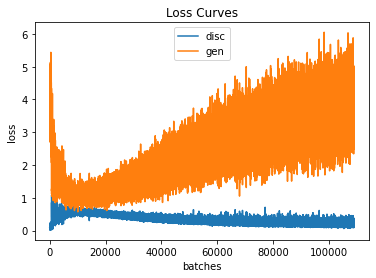

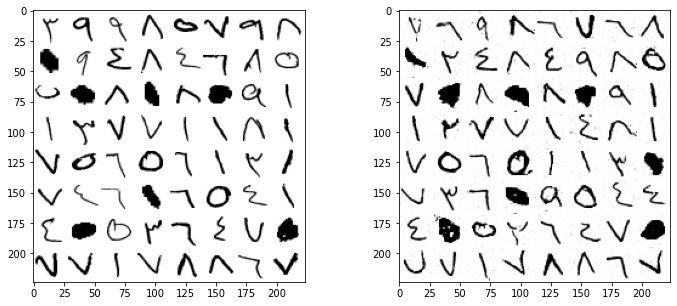

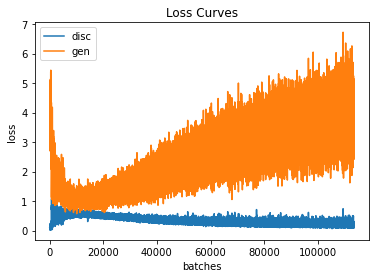

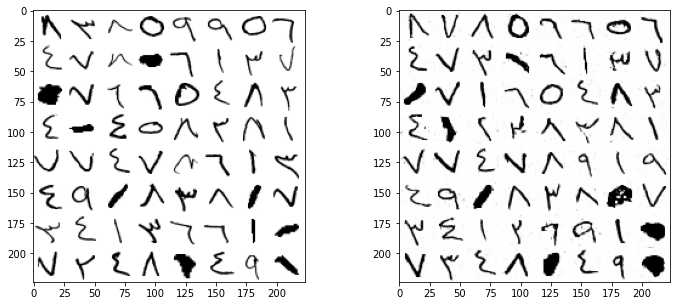

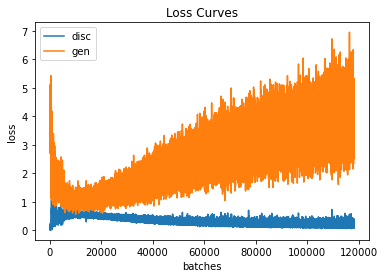

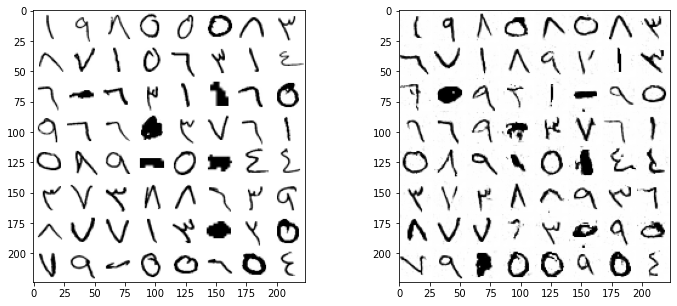

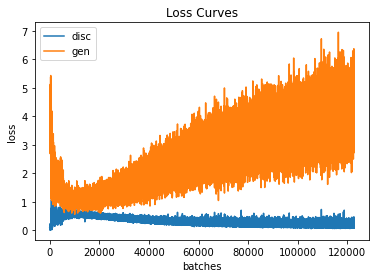

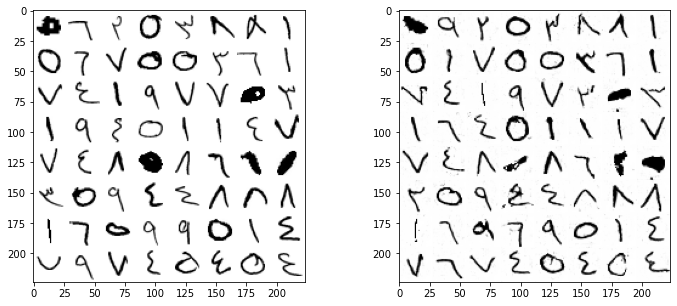

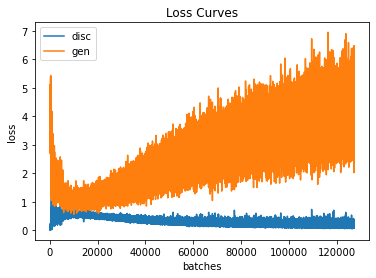

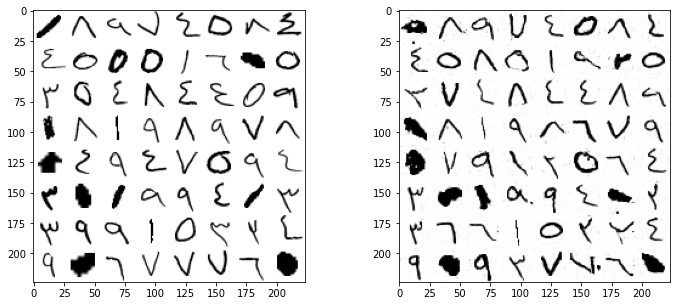

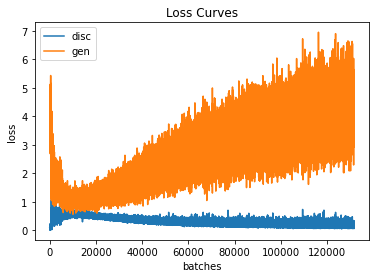

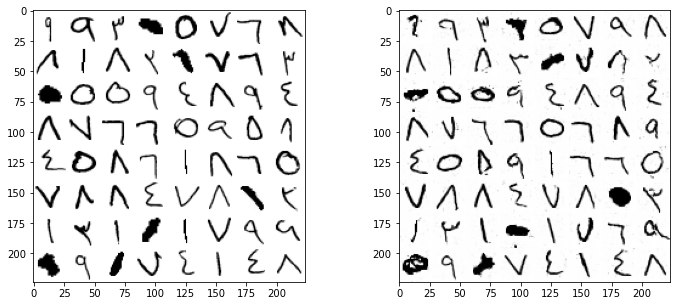

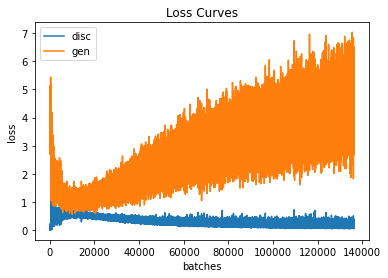

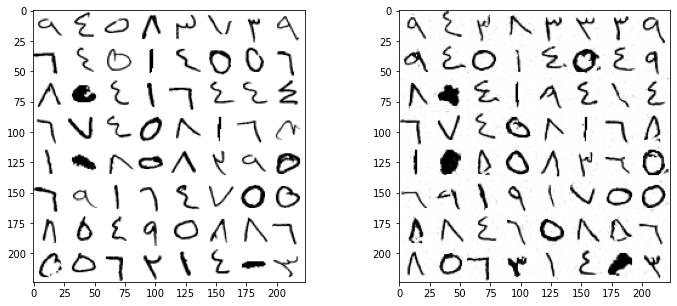

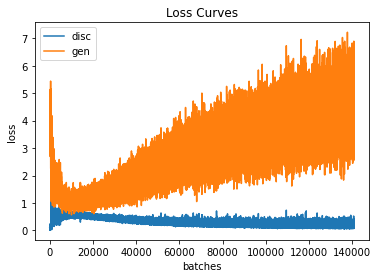

KeyboardInterrupt: 

In [13]:
train.train_gan(train_X, train_Y, gen, disc,
                lr=2e-4, batch_size=64, n_epochs=100,
                device=device, show_step=4545)

In [15]:
torch.save(gen.state_dict(), 'data/pt-cache/cgan_gen.pt')
torch.save(disc.state_dict(), 'data/pt-cache/cgan_disc.pt')